<a id="goal"></a>
## Project Description and Goal

We have the data for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

## Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import warnings
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import numpy as np
from scipy import stats as st

In [2]:
!pip install squarify
import squarify 

In [3]:
!pip install joypy
from joypy import joyplot

In [4]:
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [5]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

## Conclusion

<font color="blue">
    
The data table has 11 columns and 16715 rows.<br> 
Columns: `Name`, `Year_of_Release`, `Genre` , `Critic_Score`, `User_Score` and `Rating` have missing values.

<a id="pre"></a>
## Step 2. Data preprocessing

###  Processing missing values

In [8]:
data.columns=data.columns.str.lower()

In [9]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [10]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data.dropna(subset=['name','genre'],inplace=True)
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

<font color="blue">
    
In the column `name` and `genre` we have only 2 missing values, so we can drop them.
    

In [12]:
data[data['year_of_release'].isnull()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [13]:
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [14]:
data['year_of_release']=data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('median'))

In [15]:
data['year_of_release'] = data.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.mode()[0]))

In [16]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

<font color="blue">
    
In the column `year of release` we first fill the missing values with the median of data(years) by grouping by name and the rest with the mode of years grouping by platform. 

In rating and scores column We have a lot of missing values! 
column `use_score` in addition to the missing values contains a large number of zeros and 'tbd' too, that these are also in principle Missing values. Missed values may be due to lack of polls for some games or non-final polls. 
    
As suggested, we use a set of external data based on reviews to fill the missing values. We upload and add it to the table, but eventually a small part of the data (about 2,400 in total) was filled. So we leave the missing values and do not delete them because we need the sales data. If we want to analyse the data by scores columns, we ignore these values.    

In [17]:
data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2002.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [18]:
data['user_score']=data['user_score'].where(data['user_score']!='tbd',None)

In [19]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [20]:
data.query('user_score==0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Data type replacement

In [21]:
data['user_score'] = data['user_score'].astype('float')

In [22]:
data['year_of_release']=data['year_of_release'].astype('int')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


 - **Calculate the total sale**

In [24]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Processing duplicates

In [25]:
data.duplicated().sum()

0

## Conclosion

<font color="blue">
    
**Missing values**  
In the column `name` and `genre` we have only 2 missing values, so we can drop them.
    
In the column `year of release` we first fill the missing values with the median of data(years) by grouping by name and the rest with the mode of years grouping by platform. 

In rating and scores column We have a lot of missing values! 
column 'use_score' in addition to the missing values contains a large number of zeros and 'tbd' too, that these are also in principle Missing values. Missed values may be due to lack of polls for some games or non-final polls. 
    
As suggested, we use a set of external data based on reviews to fill the missing values. We upload and add it to the table, but eventually a small part of the data (about 2,400 in total) was filled. So we leave the missing values and do not delete them because we need the sales data. If we want to analyse the data by scores columns, we ignore these values.  
    
**Data types**
    
We change the `user_score` column type to float.
    
Calculate the total sale and add it through a new column.


<a id="exp"></a>
## Step 3. Exploratory data analysis

In [26]:
df=data.groupby('year_of_release')['name'].count().reset_index()

In [27]:
sns.set_palette('bright')

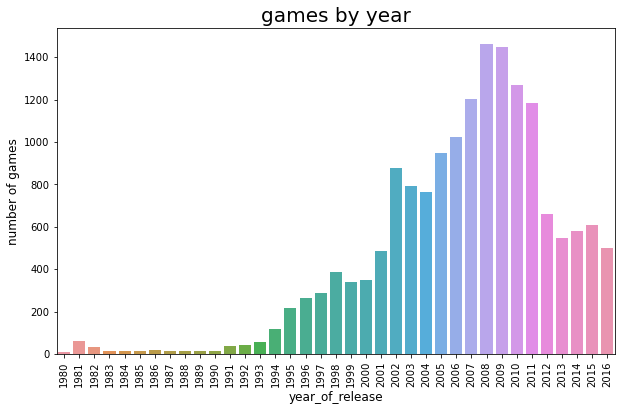

In [28]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='year_of_release', y='name', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('games by year' , fontsize=20)
ax.set_xlabel('year_of_release',fontsize=12)
ax.set_ylabel('number of games',fontsize=12)
plt.show()

In [29]:
df=data.groupby('year_of_release')['total_sales'].count().reset_index()

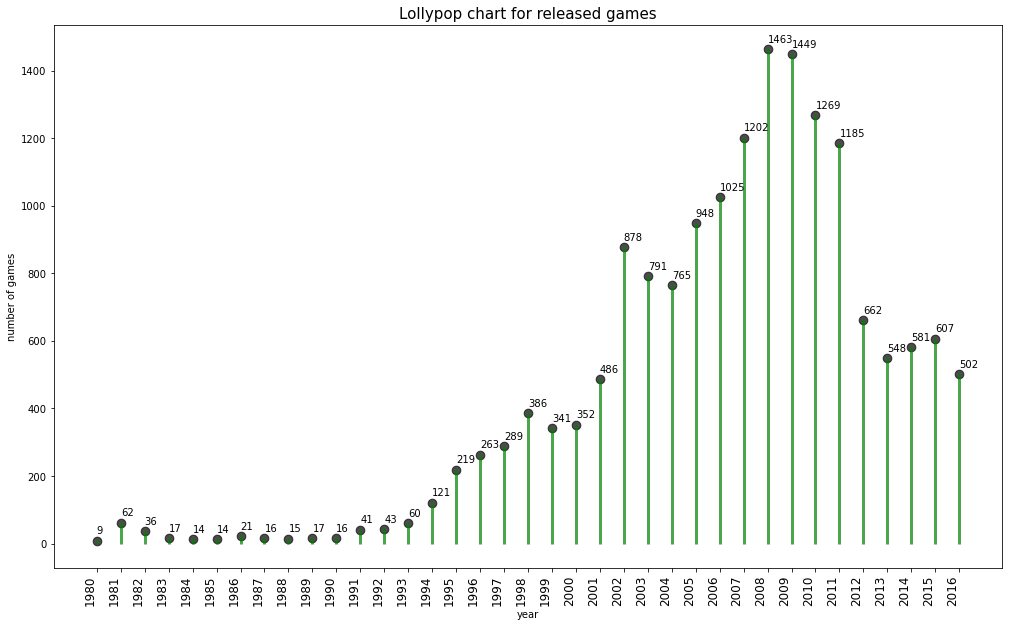

In [30]:
fig, ax = plt. subplots(figsize=(17,10)) 
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.total_sales, color='green', alpha=0.7 ,linewidth=3)
ax.scatter(x=df.year_of_release, y=df.total_sales, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop chart for released games', fontdict={'size':15})
ax.set_ylabel('number of games')
ax.set_xlabel('year')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=90, fontdict={'horizontalalignment':'right','size':12})

for row in df.itertuples():
    ax.text(row.year_of_release , row.total_sales+20, s=round(row.total_sales))

<font color="blue">We check how many games were released in different years. We see that most of the games were releasted in 2007 to 2011. Before the year 1995 few games were released and after that, the variety of games gradually increased.

In [31]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [32]:
df=data.pivot_table(index='platform', values='total_sales' , aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

In [33]:
df.head(5)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


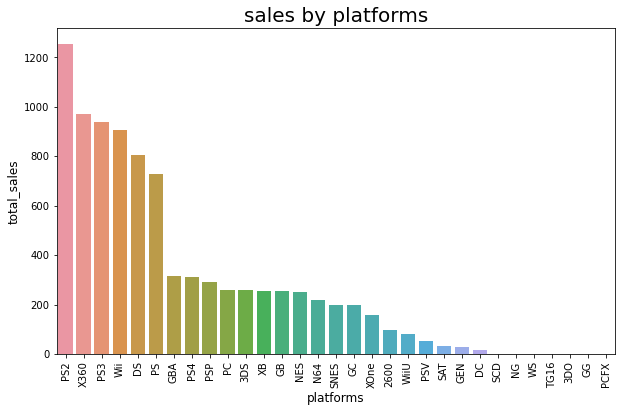

In [34]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='platform', y='total_sales', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('sales by platforms' , fontsize=20)
ax.set_xlabel('platforms',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12)
plt.show()

<font color="blue">We check the total sales for platforms. We can see that platform PS2 is the most popular platform ,then X360 and PS3. Then we check the distribution of the tree popular platforms based on data for each year.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [36]:
df=data.query('year_of_release>2007').pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

In [37]:
df

year_of_release,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,
3DS,NaN,NaN,0.30,63.67,51.76,56.57,43.76,27.78,15.14
DC,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,147.20,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
PC,12.46,17.05,26.15,35.82,23.45,13.01,13.28,8.52,5.25
PS2,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,118.79,130.93,142.96,162.44,108.28,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,36.76,37.78,35.04,17.82,7.95,3.38,0.24,0.12,NaN
PSV,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.51,4.25


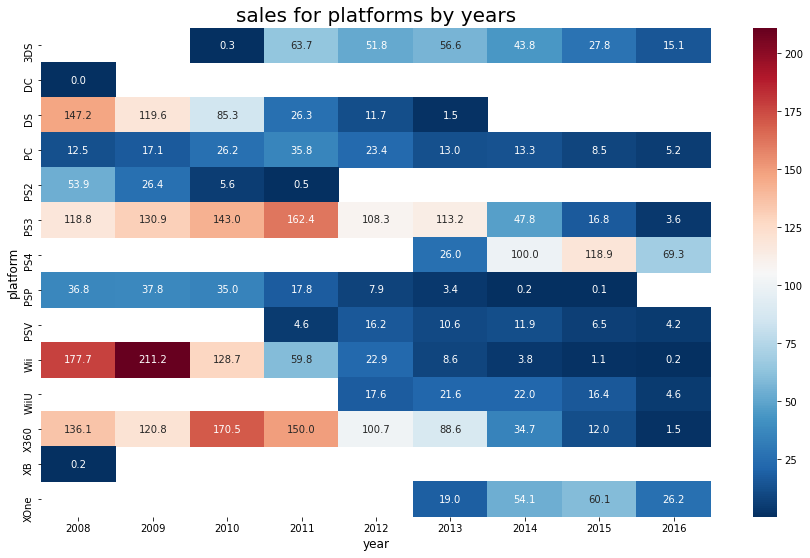

In [38]:
plt.figure(figsize=(15,9))
ax= sns.heatmap(df, annot=True, cmap='RdBu_r', fmt='.1f')
ax.set_title('sales for platforms by years' , fontsize=20)
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('platform',fontsize=12);

<font color="blue">
We see the most sale was for platform Wii in 2009, Wii had high sales in 2008 to 2010, then the sale decreased.<br>
The sale was also high for  PS3 in 2008 to 2013.<br>
In 2016 the most sale belongs to PS4 and XOne.    

In [39]:
df=data.query('platform=="PS2" or platform=="X360" or platform=="PS3"')

In [40]:
df.query('platform=="X360"')['year_of_release'].value_counts()

2011    224
2010    185
2009    174
2008    147
2007    123
2012    108
2006     94
2013     75
2014     63
2015     35
2005     21
2016     13
Name: year_of_release, dtype: int64

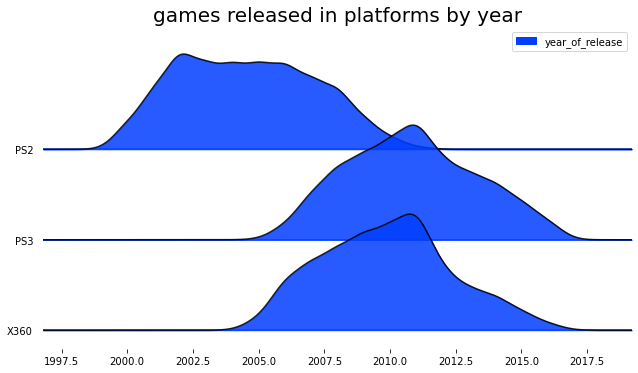

In [41]:
joyplot(
    data=df[['year_of_release', 'platform']], 
    by='platform',
    column=['year_of_release'],
     legend=True,
    alpha=0.85,
    figsize=(9, 5))

plt.title('games released in platforms by year', fontsize=20)
plt.show()

<font color="blue">We see that for each platform, sales based on the game's release year have an 11-year period. That means with the first design of the game on a new platform, its sales grow for about 5 years and reach its peak of popularity, and then sales growth decreases, and after about 11 years, no new design is done and the platform gradually disappears.

The growth period of each platform is about 5 years, and since we want to generalize the analysis for 2017, it is better to use the data of the last 3 years as the basis for the analysis.

In [42]:
data2=data.query('year_of_release>=2014')

In [43]:
df=data2.pivot_table(index='platform', values='total_sales' , aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

In [44]:
df

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.66
8,Wii,5.07
9,PSP,0.36


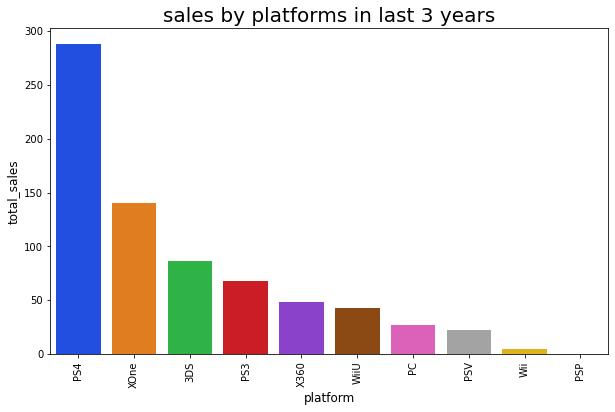

In [45]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='platform', y='total_sales', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('sales by platforms in last 3 years' , fontsize=20)
ax.set_xlabel('platform',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12)
plt.show()

In [46]:
df_tree=data2[['platform','total_sales']].groupby('platform').sum().\
sort_values('total_sales').reset_index()

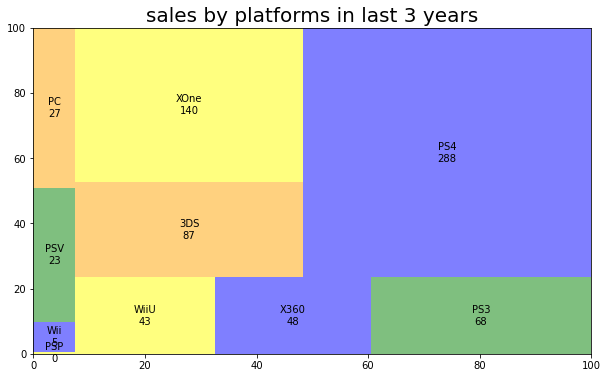

In [47]:
plt.figure(figsize=(10,6))
sizes=df_tree.total_sales.values.tolist()
label=df_tree.apply(lambda x: str(x[0])+'\n'+str(round(x[1])), axis=1)
color=['yellow','blue','green','orange']
ax=squarify.plot(sizes=sizes, label=label, alpha=0.5, color=color)
ax.set_title('sales by platforms in last 3 years' , fontsize=20);

<font color="blue">We see that the most popular platforms in the last 3 years are PS4, XOne, 3DS, PS3, X360, WiiU and PC. let's check the growth of each platforms in this period of time.

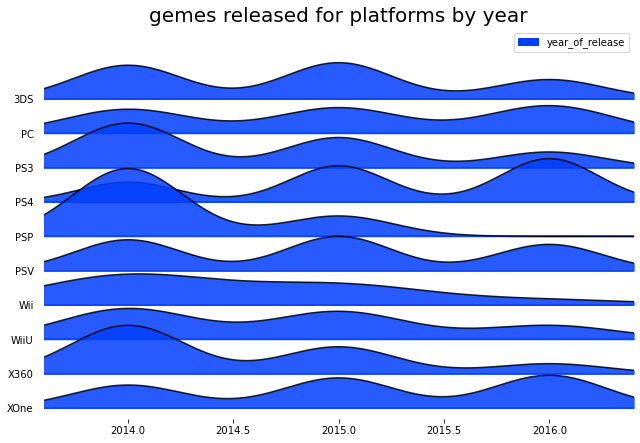

In [48]:
joyplot(
    data=data2[['year_of_release','platform']], 
    by='platform',
    column=['year_of_release'],
     legend=True,
    alpha=0.85,
    figsize=(9, 6))

plt.title('gemes released for platforms by year', fontsize=20)
plt.show()

<font color="blue">We see that platforms PS4 and XOne are growing. They are new platforms and both began to apear in 2013, PS4 has higher sales and is more popular. Other platforms are shrinking. some of them have no more new games and seems to be fade.

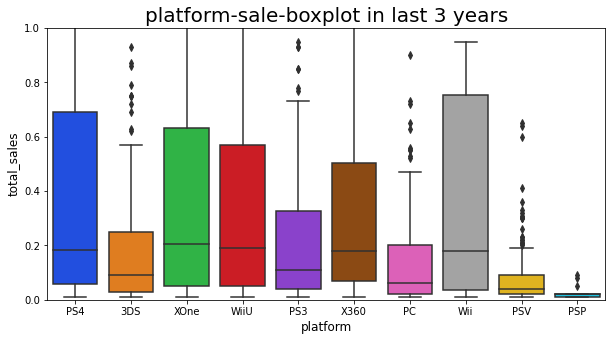

In [49]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.boxplot(x='platform' , y='total_sales', data= data2)
ax.set_title('platform-sale-boxplot in last 3 years' , fontsize=20)
ax.set_xlabel('platform',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12)
ax.set_ylim(0,1)
plt.show()

<font color="blue">We see in the box plot for the global sales of all games, broken down by platforms that the differences in sales are significant. The median of sales in platforms XOne, Wiiu, PS4, X360, Wii are higher. These platforms are as follows on mean: PS4, XOne, Wiiu, Wii, X360, 3DS. So platforms PS4 is more affected by outliers and more skewed to right. it means there are some games in this platform that are very popular.

In [50]:
df= data2.pivot_table(index='platform', values='total_sales').sort_values('total_sales', ascending=False).reset_index()

In [51]:
df

,platform,total_sales
0,PS4,0.766356
1,XOne,0.615614
2,WiiU,0.588767
3,Wii,0.460909
4,X360,0.434414
5,3DS,0.408868
6,PS3,0.311324
7,PC,0.179139
8,PSV,0.076554
9,PSP,0.027692


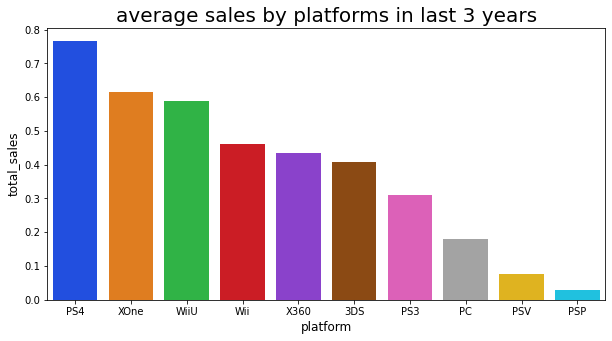

In [52]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x='platform' , y='total_sales', data=df)
ax.set_title('average sales by platforms in last 3 years' , fontsize=20)
ax.set_xlabel('platform',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12)
plt.show()

<font color="blue">To analyse how user and professional reviews affect sales, we chose one popular platform: PS4 and filter it by missing values. Build a scatter plot and calculate the correlation between reviews and sales.

In [53]:
data_PS4=data.query('platform=="PS4"')

In [54]:
data_PS4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int32  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           255 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 38.3+ KB


In [55]:
data_PS4.dropna(subset=['user_score','critic_score'],inplace=True)

In [56]:
data_PS4_filterd=data_PS4.query('~(user_score=="tbd" or user_score==0)')
len(data_PS4_filterd)

249

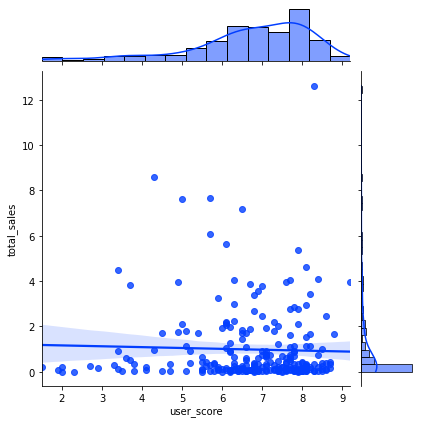

In [57]:
ax=sns.jointplot(x='user_score', y='total_sales', data=data_PS4_filterd, kind='reg')
plt.show()

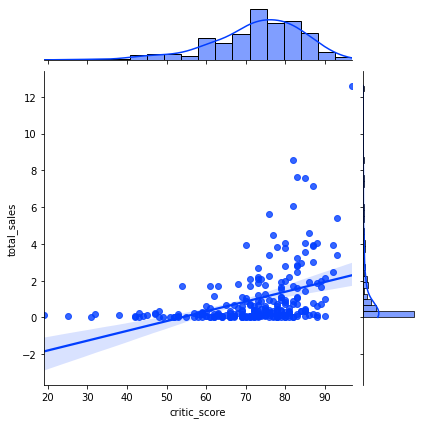

In [58]:
ax=sns.jointplot(x='critic_score', y='total_sales', data=data_PS4_filterd, kind='reg')
plt.show()

In [59]:
data_PS4_filterd['total_sales'].corr(data_PS4_filterd['critic_score'])

0.4058948014583664

In [60]:
data_PS4_filterd['total_sales'].corr(data_PS4_filterd['user_score'])

-0.033624975965288795

<font color="blue">We see that for the games in platform PS4, there is a low correlation between user reviwes and sale, but a higher correltion between sale and professionnal reviwes. Sometimes games do not have high sales despite having a high score from users or experts.

In [61]:
games=data_PS4_filterd['name']
len(games)

249

In [62]:
data5=data2.query('name in @games')
data5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [63]:
df=data5.pivot_table(index='platform',values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

In [64]:
df

,platform,total_sales
0,PS4,219.20
1,XOne,90.01
2,PS3,40.80
3,X360,33.50
4,PC,13.93
5,WiiU,5.93
6,PSV,5.50
7,Wii,4.62
8,3DS,3.65
9,PSP,0.05


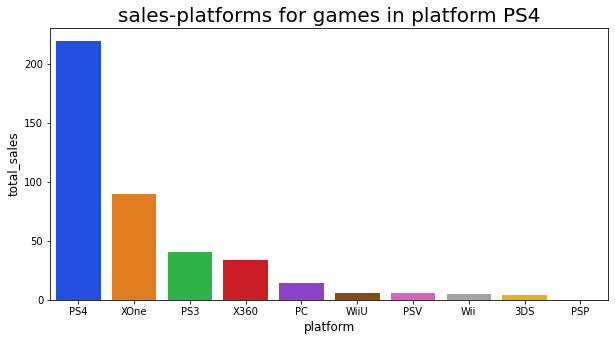

In [65]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x='platform', y='total_sales', data=df)
ax.set_title('sales-platforms for games in platform PS4' , fontsize=20)
ax.set_xlabel('platform',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12);

In [66]:
data2['platform'].value_counts()

PS4     376
PSV     296
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

<font color="blue">If we check the sales on other platforms for the same games in PS4, we see that the sale is higher for XOne, PS3 and X360 than the others. 

In [67]:
df=data2.pivot_table(index='genre',values='total_sales', aggfunc='sum').sort_values('total_sales').reset_index()

In [68]:
df

,genre,total_sales
0,Puzzle,2.21
1,Strategy,3.96
2,Simulation,13.13
3,Adventure,17.55
4,Platform,18.09
5,Racing,27.52
6,Fighting,28.22
7,Misc,37.55
8,Role-Playing,101.70
9,Sports,109.48


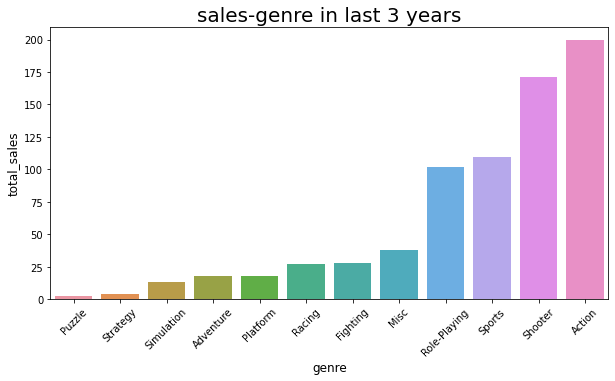

In [69]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x='genre', y='total_sales', data=df)
ax.set_title('sales-genre in last 3 years' , fontsize=20)
ax.set_xlabel('genre',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

<font color="blue">Checking the total sale for different genres, shows that the popular genres are Action, Shooter, Sports, Role_playing and Misc. Puzzle and Strategy have the lowest sale. 

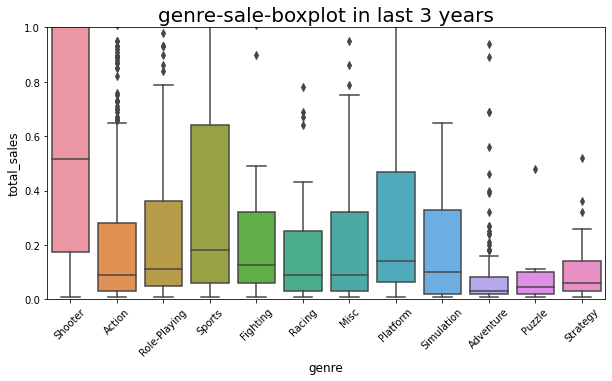

In [70]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.boxplot(x='genre' , y='total_sales', data= data2)
ax.set_title('genre-sale-boxplot in last 3 years' , fontsize=20)
ax.set_xlabel('genre',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylim(0,1);

<font color="blue">
    
We see in the box plot for the global sales of all games, broken down by genre that there are differences in sales. Genres which their median and mean of sales are higher are as follows: Shooter, Sports, Platform. The sale of these genres are the same on mean. Puzzle, Strategy and Adventure have the lowest median and mean of sale. Obviously, more exciting genres have more fans and probably more new game designs have been made for these genres. 

In [71]:
df=data2.pivot_table(index='genre', values='total_sales' , aggfunc='mean').sort_values('total_sales').reset_index()

In [72]:
df

,genre,total_sales
0,Adventure,0.094865
1,Strategy,0.107027
2,Puzzle,0.157857
3,Simulation,0.298409
4,Action,0.322068
5,Misc,0.332301
6,Racing,0.398841
7,Role-Playing,0.458108
8,Fighting,0.470333
9,Platform,0.476053


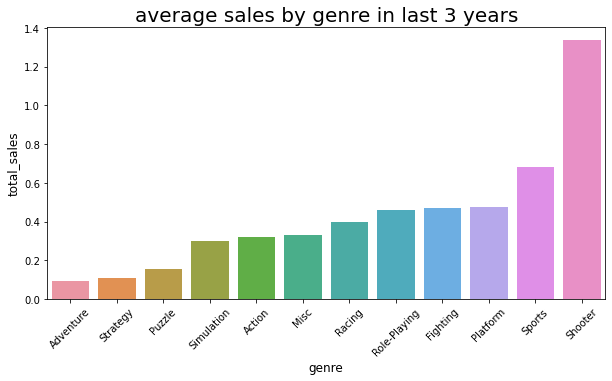

In [73]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x='genre' , y='total_sales', data= df)
ax.set_title('average sales by genre in last 3 years' , fontsize=20)
ax.set_xlabel('genre',fontsize=12)
ax.set_ylabel('total_sales',fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Conclusion

<font color="blue">
    
**Analyzing the data**
    
1- We check how many games were released in different years. We see that most of the games were released in 2007 to 2011. Before the year 1995 few games were released and after that, the variety of games gradually increased.
We check the total sales for platforms. We can see that platform PS2 is the most popular platform, then X360 and PS3. Then we check the distribution of the tree popular platforms based on data for each year.
  
2- We see that for each platform, sales based on the game's release year have an 11-year period. That means with the first design of the game on a new platform, its sales grow for about 5 years and reach its peak of popularity, and then sales growth decreases, and after about 11 years, no new design is done and the platform gradually disappears. 
    
The growth period of each platform is about 5 years, and since we want to generalize the analysis for 2017, it is better to use the data of the last 3 years as the basis for the analysis. We see that most popular platforms in the last 3 years are PS4, XOne, 3DS, PS3, X360, WiiU and PC. let's check the growth of each platforms in this period of time.  
    
3- We see that platforms PS4 and XOne are growing. They are new platforms and both began to apear in 2013, PS4 has higher sales and is more popular. Other platforms are shrinking. some of them have no more new games and seems to be fade.
    
4- We see in the box plot for the global sales of all games, broken down by platforms that the differences in sales are significant. The median of sales in platforms XOne, Wiiu, PS4, X360, Wii are higher. These platforms are as follows on mean: PS4, XOne, Wiiu, Wii, X360, 3DS. So platforms PS4 is more affected by outliers and more skewed to right. it means there are some games in this platform that are very popular.

5- To analyse how user and professional reviews affect sales, we chose one popular platform: PS4 and filter it by missing values. Build a scatter plot and calculate the correlation between reviews and sales.

6- We see that for the games in platform PS4, there is a low correlation between user reviwes and sale, but a higher correltion between sale and professionnal reviwes. Sometimes games do not have high sales despite having a high score from users or experts.

7- Checking the total sale for different genres, shows that the popular genres are Action, Shooter, Sports, Role_playing and Misc. Puzzle and Strategy have the lowest sale.

8- We see in the box plot for the global sales of all games, broken down by genre that there are differences in sales. Genres which their median and mean of sales are higher are as follows: Shooter, Sports, Platform). The sale of these genres are the same on mean. Puzzle, Strategy and Adventure have the lowest median and mean of sale.


## Step 4. Create a user profile for each region

In [74]:
data2.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


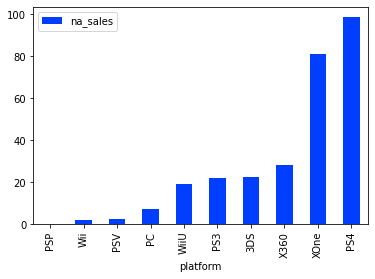

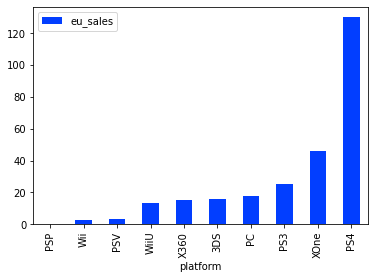

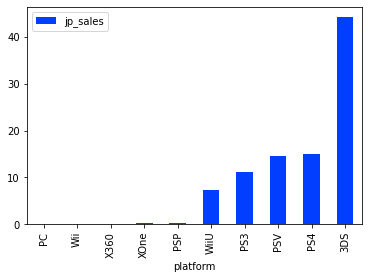

In [75]:
data2.pivot_table(index='platform', values='na_sales' , aggfunc='sum').sort_values('na_sales').plot(y='na_sales', kind='bar')
data2.pivot_table(index='platform', values='eu_sales' , aggfunc='sum').sort_values('eu_sales').plot(y='eu_sales', kind='bar')
data2.pivot_table(index='platform', values='jp_sales' , aggfunc='sum').sort_values('jp_sales').plot(y='jp_sales', kind='bar');

<font color="blue">For each region (NA, EU, JP) we check the total sale by platforms for different regions and determine The top five platforms. 
    
   - Region NA: PS4, XOne, X360, 3DS, PS3.
   - Region EU: PS4, XOne, PS3, PC, 3DS.
   - Region JP: 3DS, PS4, PSV, PS3, WiiU.
    
We see that in North American and Europe the popular platforms are almost the same, wchich means the Users' tastes are the same. But in Japan Customer behavior is different. Because Japan is one of the designers of games, it is natural that the designed platforms(like 3DS, PS4 and PSV) have more fans on their own. Platforms like PS4, 3DS and PS3 have a high sale in all three regions. 

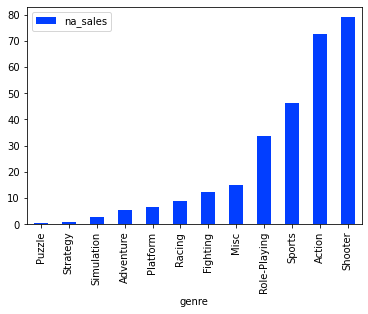

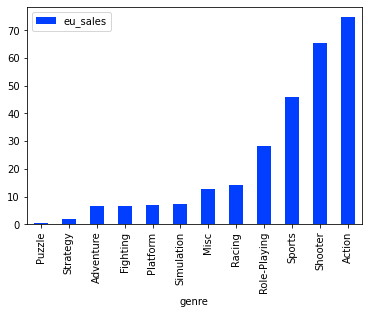

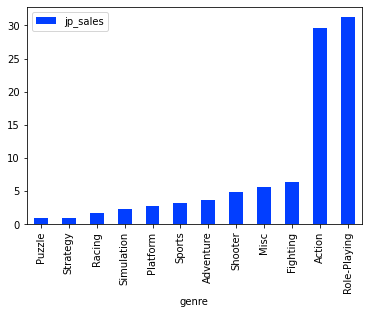

In [76]:
data2.pivot_table(index='genre', values='na_sales' , aggfunc='sum').sort_values('na_sales').plot(y='na_sales', kind='bar')
data2.pivot_table(index='genre', values='eu_sales' , aggfunc='sum').sort_values('eu_sales').plot(y='eu_sales', kind='bar')
data2.pivot_table(index='genre', values='jp_sales' , aggfunc='sum').sort_values('jp_sales').plot(y='jp_sales', kind='bar');

<font color="blue">For each region (NA, EU, JP) we check the total sale by genre for different regions and determine The top five genres. 
    
   - Region NA: Shooter, Action, Sports, Role_Playing, Misc.
   - Region EU: Action, Shooter, Sports, Role_Playing, Racing.
   - Region JP: Role_playing, Action, Fighting, Misc, Shooter.
    
We see that in North American and Europe the popular geners are almost the same too, wchich means the Users' tastes are the same. But in Japan Customer behavior is different. This difference in taste is probably due to cultural reasons and that games designed in Japan itself are closer to the tastes of users in this country. genres like Acton, Role_Playing and Shooter have a high sale in all three regions. Action and Sports have more fans in all three regions.

In [77]:
data2_filtered=data2.dropna(subset=['rating'])

In [78]:
data2_filtered[data2_filtered['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [79]:
data2_filtered['rating'].unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

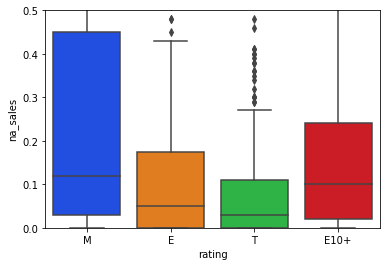

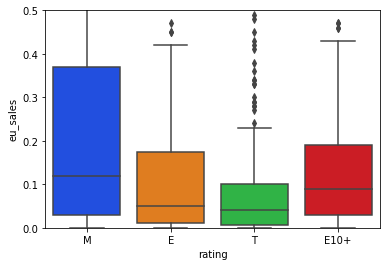

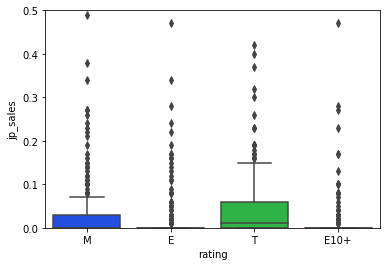

In [80]:
ax=sns.boxplot(y='na_sales',x='rating',data=data2_filtered)
ax.set_ylabel('na_sales')
ax.set_xlabel('rating')
ax.set_ylim(0,.5)
plt.show()
ax=sns.boxplot(y='eu_sales',x='rating',data=data2_filtered)
ax.set_ylabel('eu_sales')
ax.set_xlabel('rating')
ax.set_ylim(0,.5)
plt.show()
ax=sns.boxplot(y='jp_sales',x='rating',data=data2_filtered)
ax.set_ylabel('jp_sales')
ax.set_xlabel('rating')
ax.set_ylim(0,.5)
plt.show()

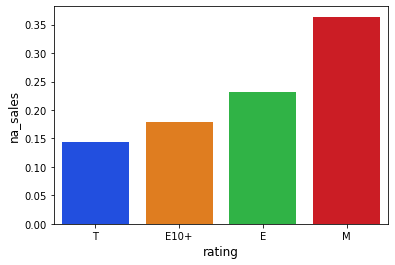

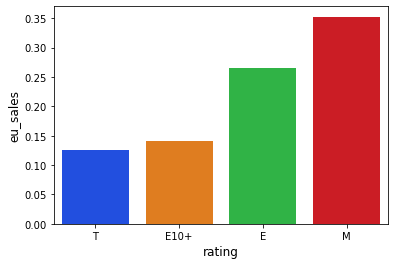

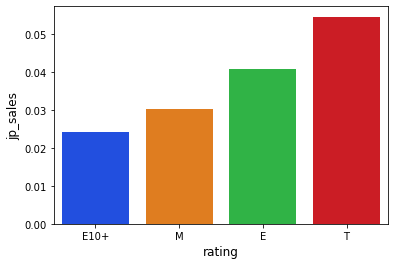

In [81]:
ax=sns.barplot(x='rating', y='na_sales',data=data2_filtered.pivot_table(index='rating', values='na_sales').sort_values('na_sales').reset_index())
ax.set_xlabel('rating',fontsize=12)
ax.set_ylabel('na_sales',fontsize=12)
plt.show() 

ax=sns.barplot(x='rating', y='eu_sales',data=data2_filtered.pivot_table(index='rating', values='eu_sales').sort_values('eu_sales').reset_index())
ax.set_xlabel('rating',fontsize=12)
ax.set_ylabel('eu_sales',fontsize=12)
plt.show() 

ax=sns.barplot(x='rating', y='jp_sales',data=data2_filtered.pivot_table(index='rating', values='jp_sales').sort_values('jp_sales').reset_index())
ax.set_xlabel('rating',fontsize=12)
ax.set_ylabel('jp_sales',fontsize=12)
plt.show() 

<font color="blue">To check if ESRB ratings affect sales in individual regions, we Build a box plot for the sales of games by Ratings and a bar plot for the average sale by ratings for each region.
    
   - Region NA: Sales vary by ESRB rating and the average sale is in the following order: M(mature), E(everyone), E10+, T(teenager), AO(adults only).
   - Region EU: Sales vary by ESRB rating and the average sale is in the following order: M, E, E10+, T, AO.
   - Region JP: Sales vary by ESRB rating and the average sale is in the following order: T, E, M, Ao, E10+. 

## Conclusion

<font color="blue">**Create a user profile for each region**
    
1- For each region (NA, EU, JP) we check the total sale by platforms for different regions and determine The top five platforms. 
    
   - Region NA: PS4, XOne, X360, 3DS, PS3.
   - Region EU: PS4, XOne, PS3, PC, 3DS.
   - Region JP: 3DS, PS4, PSV, PS3, WiiU.
    
We see that in North American and Europe the popular platforms are almost the same, wchich means the Users' tastes are the same. But in Japan Customer behavior is different. Platforms like PS4, 3DS and PS3 have a high sale in all three regions.

    

2- For each region (NA, EU, JP) we check the total sale by genre for different regions and determine The top five genres. 
    
   - Region NA: Shooter, Action, Sports, Role_Playing, Misc.
   - Region EU: Action, Shooter, Sports, Role_Playing, Racing.
   - Region JP: Role_playing, Action, Fighting, Misc, Shooter.
    
We see that in North American and Europe the popular geners are almost the same too, wchich means the Users' tastes are the same. But in Japan Customer behavior is different. genres like Acton, Role_Playing and Shooter have a high sale in all three regions. Action and Sports have more fans in all three regions

    
    
3- To check if ESRB ratings affect sales in individual regions, we Build a box plot for the sales of games by Ratings and a bar plot for the average sale by ratings for each region.
    
   - Region NA: Sales vary by ESRB rating and the average sale is in the following order: M, E, E10+, T, AO.
   - Region EU: Sales vary by ESRB rating and the average sale is in the following order: M, E, E10+, T, AO.
   - Region JP: Sales vary by ESRB rating and the average sale is in the following order: T, E, M, Ao, E10+.


<a id="hyp"></a>
## Step 5. Test the hypotheses

In [82]:
data5=data2.dropna(subset=['user_score'])

In [83]:
data5[data5['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [84]:
data5=data5.query('~(user_score=="tbd" or user_score==0)')
data5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [85]:
sample1=data5.query('platform=="XOne"')

In [86]:
stat, p = shapiro(sample1['user_score'])
alpha = 0.05
p

2.564911119407043e-05

In [87]:
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Sample does not look Normal (reject H0)


In [88]:
sample2=data5.query('platform=="PC"')

In [89]:
stat, p = shapiro(sample2['user_score'])
print(p)
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

0.0001799216988729313
Sample does not look Normal (reject H0)


In [90]:
stat, p = mannwhitneyu(sample1['user_score'], sample2['user_score'])
p

0.13876434863881087

In [91]:
if (p<alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

We can't reject the null hypothesis


<font color="blue"> **First hypothesis: Average user ratings of the Xbox One and PC platforms are the same.**

First we test if the user ratings ditribution of XOne and PC platforms are normal or not by using the Shapiro-Wilk test. They aren't normal. So to test the hypothesis, we can use the Mann-Whitney method.<br>   
H0: The average user ratings of the Xbox One and PC platforms are the same. <br>
H1: The average user ratings of the Xbox One and PC platforms differs.

<br>    
if we select the value 0.05 for alpha, the null hypothesis wouldn't be rejected. So  The average user ratings of the Xbox One and PC platforms are the same.

In [92]:
sample3=data5.query('genre=="Action"')

In [93]:
sample4=data5.query('genre=="Sports"')

In [94]:
stat, p = shapiro(sample3['user_score'])
p
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Sample does not look Normal (reject H0)


In [95]:
stat, p = shapiro(sample4['user_score'])
p
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Sample does not look Normal (reject H0)


In [96]:
stat, p = mannwhitneyu(sample3['user_score'], sample4['user_score'])
p
if (p<alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

We reject the null hypothesis


<font color="blue"> **Second hypothesis: Average user ratings for the Action and Sports genres are different.**

First we test if the user ratings ditribution of Action and Sports genres are normal or not by using the Shapiro-Wilk test. They aren't normal. So to test the hypothesis, we can use the Mann-Whitney method. <br>  
    
Ho: The average user ratings for the Action and Sports genres are the same.<br> 
H1: the average user ratings for the Action and Sports genres are different.<br>
    
if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average user ratings for the Action and Sports genres are different.

## conclusion

<font color="blue"> **First hypothesis: Average user ratings of the Xbox One and PC platforms are the same.**

First we test if the user ratings ditribution of XOne and PC platforms are normal or not by using the Shapiro-Wilk test. They aren't normal. So to test the hypothesis, we can use the Mann-Whitney method 

H0: The average user ratings of the Xbox One and PC platforms are the same.<br> 
H1: The average user ratings of the Xbox One and PC platforms differs.

if we select the value 0.05 for alpha, the null hypothesis wouldn't be rejected. So The average user ratings of the Xbox One and PC platforms are the same.
    
    
**Second hypothesis: Average user ratings for the Action and Sports genres are different.**

First we test if the user ratings ditribution of Action and Sports genres are normal or not by using the Shapiro-Wilk test. They aren't normal. So to test the hypothesis, we can use the Mann-Whitney method. 

Ho: The average user ratings for the Action and Sports genres are the same. <br>
H1: the average user ratings for the Action and Sports genres are different.

if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average user ratings for the Action and Sports genres are different.


## Step 5. Overall conclusion

<font color="blue"> 
    
### [Goal](#goal) 

We have the data for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. 

        
    
### [Data preprocessing](#pre)

In order to work with appropriate and valid data, the following tasks were performed:

 - Processing missing values
 - Type replacement
 - Processing duplicates     
    
### [Exploratory data analysis](#exp)
    
1- We check how many games were released in different years. We see that most of the games were released in 2007 to 2011. Before the year 1995 few games were released and after that, the variety of games gradually increased.
We check the total sales for platforms. We can see that platform PS2 is the most popular platform, then X360 and PS3. Then we check the distribution of the tree popular platforms based on data for each year.
  
2- We see that for each platform, sales based on the game's release year have an 11-year period. That means with the first design of the game on a new platform, its sales grow for about 5 years and reach its peak of popularity, and then sales growth decreases, and after about 11 years, no new design is done and the platform gradually disappears. 
    
The growth period of each platform is about 5 years, and since we want to generalize the analysis for 2017, it is better to use the data of the last 3 years as the basis for the analysis. We see that most popular platforms in the last 3 years are PS4, XOne, 3DS, PS3, X360, WiiU and PC. let's check the growth of each platforms in this period of time.  
    
3- We see that platforms PS4 and XOne are growing. They are new platforms and both began to apear in 2013, PS4 has higher sales and is more popular. Other platforms are shrinking. some of them have no more new games and seems to be fade.
    
4- We see in the box plot for the global sales of all games, broken down by platforms that the differences in sales are significant. The median of sales in platforms XOne, Wiiu, PS4, X360, Wii are higher. These platforms are as follows on mean: PS4, XOne, Wiiu, Wii, X360, 3DS. So platform PS4 is more affected by outliers and more skewed to right. it means there are some games in this platform that are very popular.

5- To analyse how user and professional reviews affect sales, we chose one popular platform: PS4 and filter it by missing values. Build a scatter plot and calculate the correlation between reviews and sales.

6- We see that for the games in platform PS4, there is a low correlation between user reviwes and sale, but a higher correltion between sale and professionnal reviwes. Sometimes games do not have high sales despite having a high score from users or experts.

7- Checking the total sale for different genres, shows that the popular genres are Action, Shooter, Sports, Role_playing and Misc. Puzzle and Strategy have the lowest sale.

8- We see in the box plot for the global sales of all games, broken down by genre that there are differences in sales. Genres which their median and mean of sales are higher are as follows: Shooter, Sports, Platform). The sale of these genres are the same on mean. Puzzle, Strategy and Adventure have the lowest median and mean of sale.
    
    
### Analysing the Data by paltform, genre and ESRB rating for each region
    
**platform**
    
For each region (NA, EU, JP) we check the total sale by platforms for different regions and determine The top five platforms. 
    
   - Region NA: PS4, XOne, X360, 3DS, PS3.
   - Region EU: PS4, XOne, PS3, PC, 3DS.
   - Region JP: 3DS, PS4, PSV, PS3, WiiU.
    
We see that in North American and Europe the popular platforms are almost the same, wchich means the Users' tastes are the same. But in Japan Customer behavior is different. Platforms like PS4, 3DS and PS3 have a high sale in all three regions.

    
    
**genre**
    
For each region (NA, EU, JP) we check the total sale by genre for different regions and determine The top five genres. 
    
   - Region NA: Shooter, Action, Sports, Role_Playing, Misc.
   - Region EU: Action, Shooter, Sports, Role_Playing, Racing.
   - Region JP: Role_playing, Action, Fighting, Misc, Shooter.
    
We see that in North American and Europe the popular geners are almost the same too, wchich means the Users' tastes are the same. But in Japan Customer behavior is different. genres like Acton, Role_Playing and Shooter have a high sale in all three regions. Action and Sports have more fans in all three regions.

    
    
 **ESRB rating**
    
To check if ESRB ratings affect sales in individual regions, we Build a box plot for the sales of games by Ratings and a bar plot for the average sale by ratings for each region.
    
   - Region NA: Sales vary by ESRB rating and the average sale is in the following order: M, E, E10+, T, AO.
   - Region EU: Sales vary by ESRB rating and the average sale is in the following order: M, E, E10+, T, AO.
   - Region JP: Sales vary by ESRB rating and the average sale is in the following order: T, E, M, Ao, E10+.


### [Hypothesis](#hyp)  
    
**First hypothesis: Average user ratings of the Xbox One and PC platforms are the same.**

First we test if the user ratings ditribution of XOne and PC platforms are normal or not by using the Shapiro-Wilk test. They aren't normal. So to test the hypothesis, we can use the Mann-Whitney method 

H0: The average user ratings of the Xbox One and PC platforms are the same. <br>
H1: The average user ratings of the Xbox One and PC platforms differs.<br>

if we select the value 0.05 for alpha, the null hypothesis wouldn't be rejected. So The average user ratings of the Xbox One and PC platforms are the same.
    
    
**Second hypothesis: Average user ratings for the Action and Sports genres are different.**

First we test if the user ratings ditribution of Action and Sports genres are normal or not by using the Shapiro-Wilk test. They aren't normal. So to test the hypothesis, we can use the Mann-Whitney method. 

H0: The average user ratings for the Action and Sports genres are the same. <br>
H1: the average user ratings for the Action and Sports genres are different.<br>

if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average user ratings for the Action and Sports genres are different.
    
### Final conclusions
Most popular platforms in the last 3 years are PS4, XOne, Wiiu, Wii and X360. Each platform has an 11-year lifetime and then gradually fades. PS4 and XOne are growing in sale and others are shrinking.
The popular genres are Action, Shooter, Sports, Role_playing and Misc. Puzzle and Strategy have the lowest sale. 
Customer behavior is slightly different in different regions. This difference is especially evident in Japan.    